In [2]:
import matplotlib.pyplot as plt

In [3]:
from face_swap.image_preprocessing import *
from face_swap.utils import *
from face_swap.keypoints import *

In [4]:
source_img_path = "data/macron1.jpg"
target_img_path = "data/f1.jpg"

source_img = read_image(source_img_path)
target_img = read_image(target_img_path)

s_aligned, s_ldmks = get_aligned_image(source_img)
t_aligned, t_ldmks = get_aligned_image(target_img)

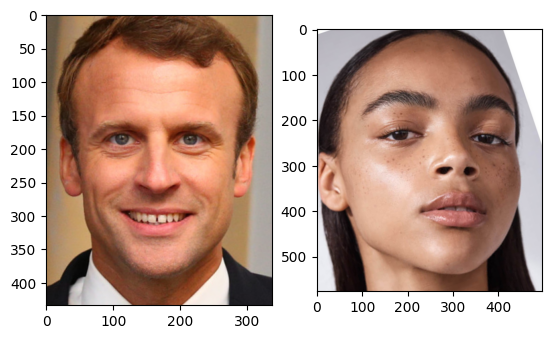

In [5]:
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(s_aligned)
axarr[1].imshow(t_aligned)

In [6]:
mixed_clone = t_aligned.copy()
added = np.zeros(t_aligned.shape, np.uint8)

for zone in ALL_ZONES:
    s_zone_ldmks = get_zone_landmarks(zone.align_keypoints, s_ldmks)
    t_zone_ldmks = get_zone_landmarks(zone.align_keypoints, t_ldmks)

    s_zone_patch = get_patch_image(s_aligned, zone.keypoints, s_ldmks)
    t_zone_patch = get_patch_image(t_aligned, zone.keypoints, t_ldmks)

    rotation_matrix, _ = cv2.estimateAffinePartial2D(s_zone_ldmks, t_zone_ldmks)
    s_rotated = cv2.warpAffine(
        s_zone_patch, 
        rotation_matrix, 
        (t_zone_patch.shape[1], t_zone_patch.shape[0])
        )
    
    added = cv2.add(added, s_rotated)

    t_scale_ldmks = get_zone_landmarks(zone.keypoints, t_ldmks)
    center_x = (np.max(t_scale_ldmks[:, 0]) + np.min(t_scale_ldmks[:, 0])) // 2
    center_y = (np.max(t_scale_ldmks[:, 1]) + np.min(t_scale_ldmks[:, 1])) // 2

    mixed_clone = cv2.seamlessClone(
        s_rotated, 
        mixed_clone, 
        s_rotated[:, :, 0], 
        (center_x, center_y), 
        cv2.MIXED_CLONE
        )

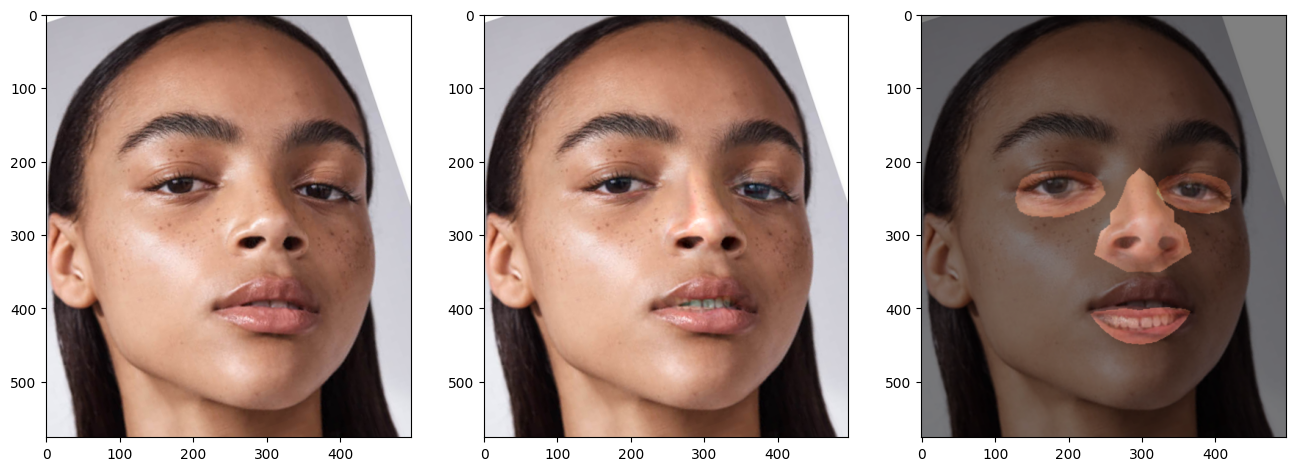

In [7]:
f, axarr = plt.subplots(1, 3, figsize=(16,9))
axarr[0].imshow(t_aligned)
axarr[1].imshow(mixed_clone)
axarr[2].imshow(cv2.addWeighted(t_aligned, 0.5, added, 0.4, 0))

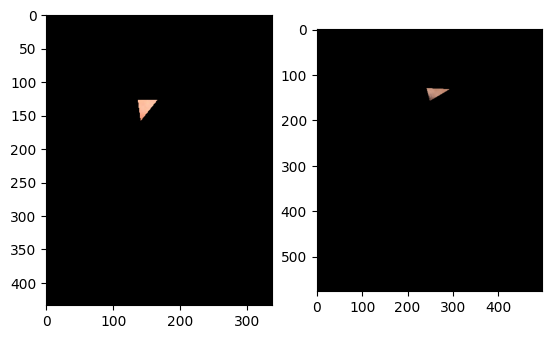

In [10]:
TR = [108, 107, 151]
s_zone_ldmks = get_zone_landmarks(TR, s_ldmks)
t_zone_ldmks = get_zone_landmarks(TR, t_ldmks)

s_zone_patch = get_patch_image(s_aligned, TR, s_ldmks)
t_zone_patch = get_patch_image(t_aligned, TR, t_ldmks)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(s_zone_patch)
axarr[1].imshow(t_zone_patch)

In [11]:
rotation_matrix, _ = cv2.estimateAffinePartial2D(s_zone_ldmks, t_zone_ldmks)
s_rotated = cv2.warpAffine(
        s_zone_patch, 
        rotation_matrix, 
        (t_zone_patch.shape[1], t_zone_patch.shape[0])
        )

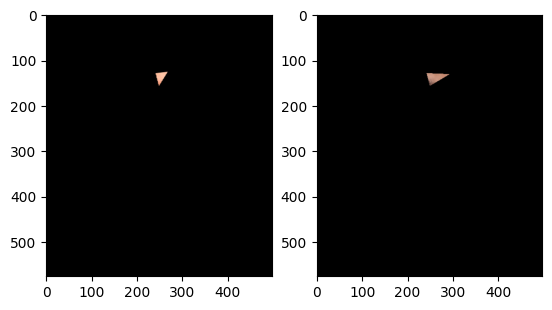

In [12]:
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(s_rotated)
axarr[1].imshow(t_zone_patch)

In [21]:
convexhull2 = cv2.convexHull(t_zone_ldmks)

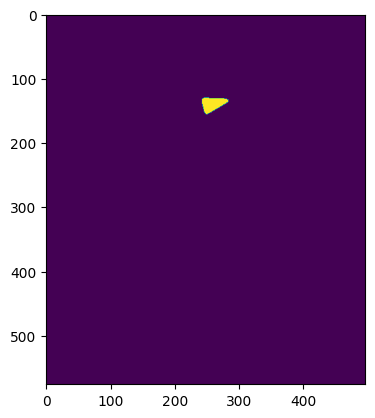

In [45]:
t_zone_mask =( t_zone_patch[:, :, 0] > 0).astype(np.uint8)
# s_masked = cv2.bitwise_and(s_rotated, s_rotated, mask=t_zone_mask)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
smoothed_mask = cv2.morphologyEx(t_zone_mask, cv2.MORPH_OPEN, kernel)
smoothed_mask = cv2.GaussianBlur(smoothed_mask, (15, 15), 0)
s_masked = cv2.bitwise_and(s_rotated, s_rotated, mask=t_zone_mask)
plt.imshow(smoothed_mask)

In [25]:
image1 = s_rotated.copy()
# image1 = cv2.polylines(image1, [t_zone_ldmks], True, (255, 0, 0), 2)
image1 = cv2.polylines(image1, convexhull2, True, (255, 0, 0), 2)

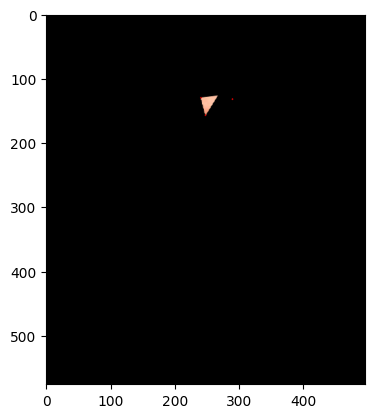

In [26]:
plt.imshow(image1)

In [ ]:

        if flag_change_face:
            base_face_handler, landmark_base_ocv, base_input_image = \
                process_base_face_mesh(drawing_spec, face_mesh, change_face_list[face_list_index],
                                       show_landmarks=key_draw_landmarks,
                                       show_triangulated_mesh=key_draw_landmarks)
            flag_change_face = False
        image_rows, image_cols, _ = webcam_img.shape
        webcam_img.flags.writeable = False
        results = face_mesh.process(webcam_img)
        landmark_target_ocv = transform_landmarks_from_tf_to_ocv(results,
                                                                 image_cols,
                                                                 image_rows)

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=out_image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec=drawing_spec,
                    connection_drawing_spec=drawing_spec)

                # out_image = draw_triangulated_mesh(landmark_target_ocv, webcam_img)
                if len(landmark_target_ocv) > 0:
                    points2 = np.array(landmark_target_ocv, np.int32)
                    convexhull2 = cv2.convexHull(points2)
                    process = True
                    if process == True:
                        for i in range(0, int(len(tmp.TRIANGULATION) / 3)):
                            triangle_index = [tmp.TRIANGULATION[i * 3],
                                              tmp.TRIANGULATION[i * 3 + 1],
                                              tmp.TRIANGULATION[i * 3 + 2]]
                            tbas1 = landmark_base_ocv[triangle_index[0]]
                            tbas2 = landmark_base_ocv[triangle_index[1]]
                            tbas3 = landmark_base_ocv[triangle_index[2]]
                            triangle1 = np.array([tbas1, tbas2, tbas3], np.int32)

                            rect1 = cv2.boundingRect(triangle1)
                            (x, y, w, h) = rect1
                            cropped_triangle = base_input_image[y: y + h, x: x + w]
                            cropped_tr1_mask = np.zeros((h, w), np.uint8)

                            points = np.array([[tbas1[0] - x, tbas1[1] - y],
                                               [tbas2[0] - x, tbas2[1] - y],
                                               [tbas3[0] - x, tbas3[1] - y]], np.int32)

                            cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
                            ttar1 = landmark_target_ocv[triangle_index[0]]
                            ttar2 = landmark_target_ocv[triangle_index[1]]
                            ttar3 = landmark_target_ocv[triangle_index[2]]

                            triangle2 = np.array([ttar1, ttar2, ttar3], np.int32)

                            rect2 = cv2.boundingRect(triangle2)
                            (x, y, w, h) = rect2

                            cropped_tr2_mask = np.zeros((h, w), np.uint8)

                            points2 = np.array([[ttar1[0] - x, ttar1[1] - y],
                                                [ttar2[0] - x, ttar2[1] - y],
                                                [ttar3[0] - x, ttar3[1] - y]], np.int32)

                            cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
                            # Warp triangles
                            points = np.float32(points)
                            points2 = np.float32(points2)
                            M = cv2.getAffineTransform(points, points2)
                            warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h),borderMode=cv2.BORDER_REPLICATE)
                            warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

                            # Reconstructing destination face
                            img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
                            img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
                            _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255,
                                                                       cv2.THRESH_BINARY_INV)
                            warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle,
                                                              mask=mask_triangles_designed)

                            img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
                            img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area
                        # Face swapped (putting 1st face into 2nd face)
                        img2_face_mask = np.zeros_like(img2_gray)
                        img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
                        img2_face_mask = cv2.bitwise_not(img2_head_mask)

                        img2_head_noface = cv2.bitwise_and(seam_clone, seam_clone, mask=img2_face_mask)
                        result = cv2.add(img2_head_noface, img2_new_face)

                        (x, y, w, h) = cv2.boundingRect(convexhull2)
                        center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))
                        seamlessclone = cv2.seamlessClone(result, seam_clone,
                                                          img2_head_mask, center_face2, cv2.MIXED_CLONE)